In [1]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Dense, Dropout, Flatten
from keras.optimizers import SGD

from keras.datasets import mnist
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

Using TensorFlow backend.



   _INPUT => CONV => TANH => POOL => CONV => TANH => POOL => FC => TANH => FC_


Input layer: $ W \times W = 28 \times 28 $

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
w, h = X_train.shape[1:]

In [4]:
X_train = X_train.reshape(X_train.shape[0], w, h, 1)
X_test = X_test.reshape(X_test.shape[0], w, h, 1)

In [5]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

                                Some visualizations

In [7]:
indices = np.random.randint(len(X_train), size=9)


In [8]:
X_train[582].shape

(28, 28, 1)

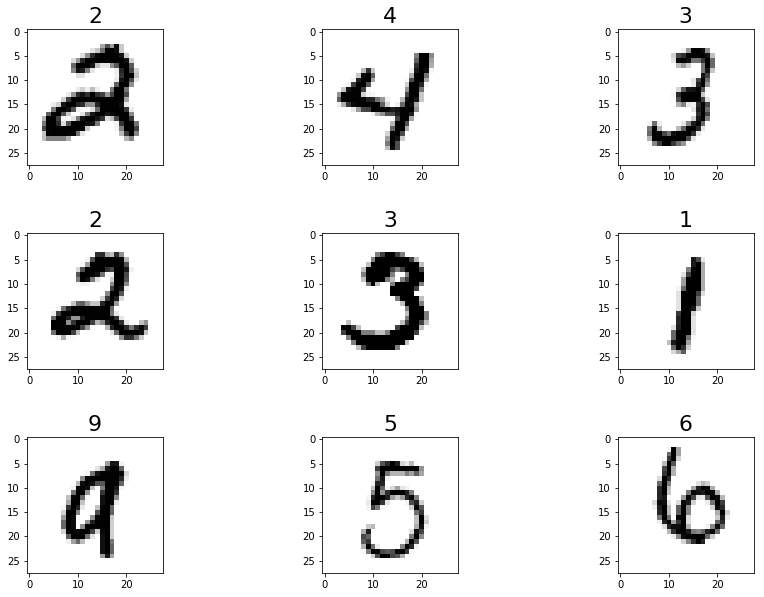

In [9]:
plt.figure(figsize=(15,10))
for i in range(len(indices)):
    
    plt.subplot(331 + i)
    plt.subplots_adjust(hspace=0.5)
    plt.title(y_train[indices[i]].argmax(), fontsize=22)
    plt.imshow(-X_train[indices[i]].reshape(28,28), cmap='gray')
    
plt.show()
    

                                Build the LeNet model

In [10]:
model = Sequential()
# Convolutional layer with ReLu activation and maxpooling
model.add(Conv2D(20,5, padding="same", input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
# Add Fully-Connected layer with 500 nodes
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))
# Softmax activation and output
model.add(Dense(10))
model.add(Activation("softmax"))


                            Compile and train the model

In [11]:
num_epochs = 33

In [12]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=SGD(0.01))
train_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, epochs=33, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/33
60000/60000 [==============================] - 3s 54us/step - loss: 0.8568 - acc: 0.7895 - val_loss: 0.3306 - val_acc: 0.9082
Epoch 2/33
60000/60000 [==============================] - 2s 34us/step - loss: 0.3051 - acc: 0.9116 - val_loss: 0.2549 - val_acc: 0.9242
Epoch 3/33
60000/60000 [==============================] - 2s 34us/step - loss: 0.2489 - acc: 0.9279 - val_loss: 0.2153 - val_acc: 0.9386
Epoch 4/33
60000/60000 [==============================] - 2s 34us/step - loss: 0.2132 - acc: 0.9383 - val_loss: 0.1914 - val_acc: 0.9448
Epoch 5/33
60000/60000 [==============================] - 2s 34us/step - loss: 0.1875 - acc: 0.9458 - val_loss: 0.1674 - val_acc: 0.9514
Epoch 6/33
60000/60000 [==============================] - 2s 34us/step - loss: 0.1669 - acc: 0.9521 - val_loss: 0.1489 - val_acc: 0.9586
Epoch 7/33
60000/60000 [==============================] - 2s 34us/step - loss: 0.1502 - acc: 0.9564 - val_loss: 0.1397 - val_acc

                            Evaluate the model

In [13]:
y_pred = model.predict(X_test, batch_size=128)


In [14]:
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.97      0.98      1009

   micro avg       0.98      0.98      0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



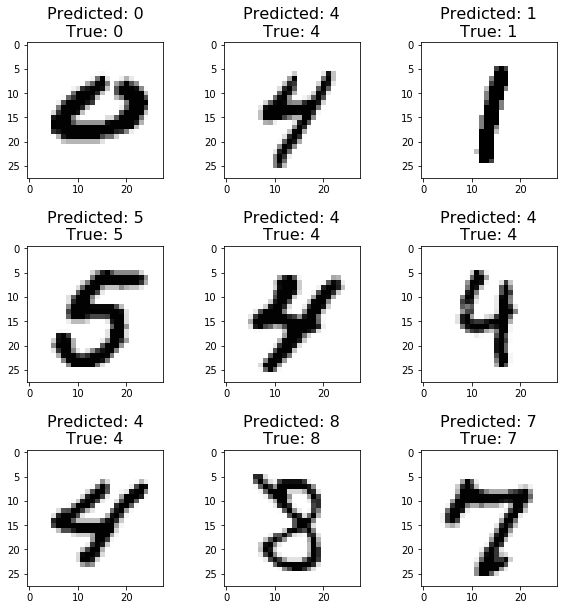

In [15]:
plt.figure(figsize=(10,10))
indices = np.random.randint(len(X_test), size=9)
for i in range(len(indices)):
    
    plt.subplot(331 + i)
    plt.subplots_adjust(hspace=0.5)
    title = f'Predicted: {y_pred[indices[i]].argmax()}\nTrue: {y_test[indices[i]].argmax()}'
    plt.title(title, fontsize=16)
    plt.imshow(-X_test[indices[i]].reshape(28,28), cmap='gray')
    
plt.show()

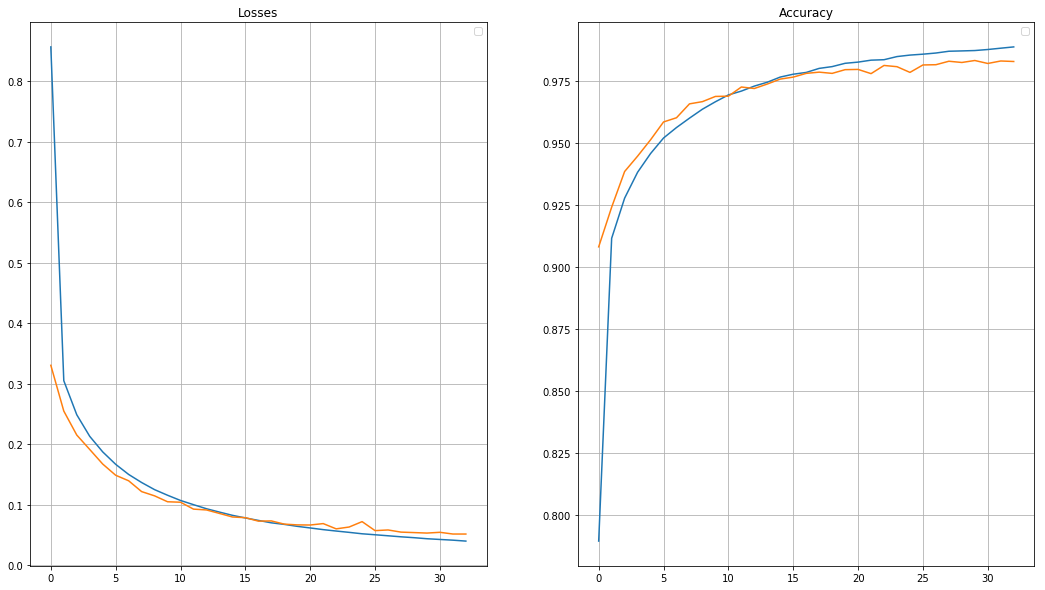

In [17]:
plt.figure(figsize=(18,10))

plt.subplot(121)
plt.grid()
plt.title("Losses")
plt.legend(("Training losses", "Test losses"))
plt.plot(np.arange(0, num_epochs), train_history.history["loss"])
plt.plot(np.arange(0, num_epochs), train_history.history["val_loss"])

plt.subplot(122)
plt.grid()
plt.title("Accuracy")
plt.legend(("Accuracy on train data", "Accuracy on test data"))
plt.plot(np.arange(0, num_epochs), train_history.history["acc"])
plt.plot(np.arange(0, num_epochs), train_history.history["val_acc"])

plt.show()